In [128]:
from config import views
from spark import createSession

from typing import List

from matplotlib import pyplot as plt
from pyspark.sql.dataframe import DataFrame

import pyspark.sql.functions as F
import pyspark.sql.types as T

from IPython.display import display

In [129]:
def get_columns_of_type(data_frame: DataFrame, type: str) -> List[str]:
    return [column[0] for column in data_frame.dtypes if column[1] == type]

In [130]:
LENGTH = 80
def show_table_name(table: str) -> None:
    print('=' * LENGTH)
    print(' ' * ((LENGTH - len(table)) // 2), table.upper())
    print('=' * LENGTH)

def show_column_name(column: str) -> None:
    print(column.upper())

In [131]:
VERSION = 'v2'

views = views(VERSION)
spark = createSession()

for view, file in views.items():
    df = spark.read.json(file)
    for column in get_columns_of_type(df, 'boolean'):
        df = df.withColumn(column, F.col(column).cast(T.IntegerType()))
    df.createOrReplaceTempView(view)

In [132]:
DATA_FRAMES = list(zip(views.keys(), [spark.sql(f"SELECT * FROM {view}") for view in views.keys()]))

In [133]:
for view, df in DATA_FRAMES:
    show_table_name(view)
    display(df.toPandas())

                                     ARTISTS


,genres,id,name
0,"[filmi, indian folk, indian rock, kannada pop]",72578usTM6Cj5qWsi471Nc,Raghu Dixit
1,"[desi pop, hindi indie, indian indie, indian r...",7b6Ui7JVaBDEfZB9k6nHL0,The Local Train
2,[indian folk],4bvGDTEPFnllKiJaEZGuXk,Achint
3,"[opm, pinoy hip hop, pinoy r&b, pinoy trap, ta...",0n4a5imdLBN24fIrBWoqrv,Because
4,"[hindi indie, indian indie, indian singer-song...",4gdMJYnopf2nEUcanAwstx,Anuv Jain
...,...,...,...
27519,[italian hip hop],2My6j5BEgOi8VHi5WGVyfw,Apocalypshit Army
27520,[belgian pop],0bzW9kGcTyMxXuG9dUdj7E,GRANDGEORGE
27521,[thai indie],4iS19hLpsgRd8jLPKI4Ni3,Blissonic
27522,[thai indie],3JGC3LkYrwlrTscixVwY72,พราว


                                     SESSIONS


""


                                  TRACK_STORAGE


,daily_cost,storage_class,track_id
0,0.003752,SLOW,708ZiYL3ydBWHS2a7gvJB3
1,0.014561,SLOW,48SFtLr5URCI97X2Ynfdnc
2,0.008304,SLOW,1y0U0HAe5QfTRzOsz74bOt
3,0.012207,SLOW,2TlbZ8JhF9ORa7lJylxABw
4,0.011799,SLOW,7ij5kN8jwXr8fZD54M0xb6
...,...,...,...
129643,0.010739,SLOW,59nszNIEDpnOS0prsKudPb
129644,0.010683,SLOW,0xiHNGGiSfrFfOJZGpxpJY
129645,0.010423,SLOW,4peXvhLT61oP9leXdPQ36B
129646,0.010741,SLOW,2pS2IdtMXpvaEONreUlSAo


                                      TRACKS


,acousticness,danceability,duration_ms,energy,explicit,id,id_artist,instrumentalness,key,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence
0,0.8390,0.740,75040,0.891,0,708ZiYL3ydBWHS2a7gvJB3,0PCtW4w0RN89andUBQ3TVv,0.000000,7,0.8690,-7.480,031 - Der Schatz im Silbersee I - Teil 39,13,1968-09-11,0.8920,51.496,0.557
1,0.6950,0.603,291227,0.517,0,48SFtLr5URCI97X2Ynfdnc,2yTUYhIf8fxptTIy3KLuJD,0.000003,6,0.7440,-8.504,Par Avion (Live) ( 2014 - Remaster) - Live; 20...,0,2014,0.0235,96.181,0.327
2,0.9530,0.313,166080,0.116,0,1y0U0HAe5QfTRzOsz74bOt,338mC0yGyX0C9of8QMJ5hK,0.331000,0,0.1610,-12.645,My Foolish Heart,25,1950-01-01,0.0319,74.071,0.255
3,0.1670,0.958,244133,0.635,0,2TlbZ8JhF9ORa7lJylxABw,5A4ExW2nMBFRy2JDoYUcUE,0.000000,11,0.3620,-7.853,Kathysterisi,14,1998,0.2590,108.024,0.866
4,0.1200,0.684,235974,0.839,0,7ij5kN8jwXr8fZD54M0xb6,48CUA59SDed3IdCctKndud,0.000000,4,0.3540,-6.457,Aleni Aleni,51,2015,0.0658,128.051,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129643,0.4110,0.633,214773,0.345,0,59nszNIEDpnOS0prsKudPb,6wcIBaOvA9XNGgPujYZZ7L,0.000028,4,0.3610,-15.231,最真的夢,16,1990-02-05,0.0291,132.691,0.368
129644,0.2220,0.295,213667,0.417,0,0xiHNGGiSfrFfOJZGpxpJY,04u3fc37nHFKN7GJTSIwI8,0.000006,6,0.1480,-8.002,By My Side,61,2017-08-11,0.0307,64.687,0.135
129645,0.6720,0.347,208467,0.216,0,4peXvhLT61oP9leXdPQ36B,4etuCZVdP8yiNPn4xf0ie5,0.000118,8,0.0738,-15.215,Cu Cu Rru Cu Cu Paloma,49,1978,0.0315,108.566,0.478
129646,0.0229,0.784,214827,0.821,0,2pS2IdtMXpvaEONreUlSAo,6IE6z7DcZIT4Ml3Fh5Ivch,0.000007,0,0.1760,-7.621,No Quiero Saber - 2000 Mix,26,1990,0.0423,119.609,0.885


                                      USERS


,city,favourite_genres,name,premium_user,street,user_id
0,Warszawa,"[motown, soul, regional mexican]",Marika Pilipczuk,1,ul. Księżycowa 31,101
1,Gdynia,"[regional mexican, psychedelic rock, new roman...",Anita Pioch,0,plac Sadowa 527,102
2,Kraków,"[soul, mellow gold, blues rock]",Jan Gryga,0,plac Wyspiańskiego 73/43,103
3,Wrocław,"[permanent wave, post-teen pop, mandopop]",Ksawery Klus,1,ulica Długosza 71/06,104
4,Gdynia,"[metal, new wave, argentine rock]",Maciej Bandyk,0,ul. Rybacka 07,105
...,...,...,...,...,...,...
19995,Warszawa,"[latin rock, lounge, alternative metal]",Ernest Mikoda,0,plac Mieszka I 25/28,20096
19996,Szczecin,"[new wave, soft rock, regional mexican]",Leonard Wrochna,1,ulica Tysiąclecia 25,20097
19997,Szczecin,"[alternative rock, tropical, rock en espanol]",Kornel Ernst,0,plac Morska 87,20098
19998,Warszawa,"[album rock, latin rock, dance pop]",Olga Miąsik,0,plac Opolska 61/80,20099


In [134]:
for view, data_frame in DATA_FRAMES:
    show_table_name(view)
    for column, type in data_frame.dtypes:
        show_column_name(column)
        group_by_column = f"""--sql
            SELECT 
                {column},
                COUNT(*) AS length
            FROM {view}
            GROUP BY {column}
            ORDER BY {column} IS NULL DESC, length DESC, {column} NULLS FIRST
        """
        df = spark.sql(group_by_column)
        display(df.toPandas())

        count_distinct = f"""--sql
            SELECT
                COUNT(DISTINCT {column})
            FROM {view}
        """
        df = spark.sql(count_distinct)
        display(df.toPandas())

                                     ARTISTS
GENRES


,genres,length
0,[indonesian pop],78
1,[classic thai pop],74
2,[thai pop],63
3,[classic turkish pop],59
4,[classic israeli pop],58
...,...,...
13577,[yiddish folk],1
13578,[yoga],1
13579,[yugoslav new wave],1
13580,[zhongguo feng],1


,count(DISTINCT genres)
0,13582


ID


,id,length
0,0001wHqxbF2YYRQxGdbyER,1
1,000p4jMMhpEHq1h6PFCyO1,1
2,001aJOc7CSQVo3XzoLG4DK,1
3,0027wHZDQXpRll4ckwDGad,1
4,002oyMRzxTzEsBRLzACi8d,1
...,...,...
27519,7zup4xIPjtv50lM7x3n4qW,1
27520,7zw8gWmNncuk2QZHIc70So,1
27521,7zwF847GE2hY5ApGSOLmBG,1
27522,7zwiFdY90oXzLh1Wz22oEq,1


,count(DISTINCT id)
0,27524


NAME


,name,length
0,TNT,4
1,Kali,3
2,Sebastian,3
3,Akcent,2
4,Alice,2
...,...,...
27411,黃韻玲,1
27412,黑豹,1
27413,龍飄飄,1
27414,龔秋霞,1


,count(DISTINCT name)
0,27416


                                     SESSIONS
                                  TRACK_STORAGE
DAILY_COST


,daily_cost,length
0,0.009600,44
1,0.011700,41
2,0.008000,39
3,0.010000,39
4,0.010800,38
...,...,...
47433,0.229282,1
47434,0.236263,1
47435,0.239629,1
47436,0.239863,1


,count(DISTINCT daily_cost)
0,47438


STORAGE_CLASS


,storage_class,length
0,SLOW,128369
1,MEDIUM,1275
2,FAST,4


,count(DISTINCT storage_class)
0,3


TRACK_ID


,track_id,length
0,000jBcNljWTnyjB4YO7ojf,1
1,000u1dTg7y1XCDXi80hbBX,1
2,0017A6SJgTbfQVU2EtsPNo,1
3,001UI3J6PKAEnBgqrwGGQC,1
4,001gx41rQo0bKh063TrC1I,1
...,...,...
129643,7zyVHUVIXfHbsYdJeKzuOn,1
129644,7zyfs9tucIQUDqU9XFyePO,1
129645,7zysi0YkDNAzlKWpBgTowz,1
129646,7zzZmpw8L66ZPjH1M6qmOs,1


,count(DISTINCT track_id)
0,129648


                                      TRACKS
ACOUSTICNESS


,acousticness,length
0,0.99500,525
1,0.99400,426
2,0.99300,355
3,0.99200,317
4,0.99100,312
...,...,...
4535,0.00853,1
4536,0.00868,1
4537,0.00926,1
4538,0.00960,1


,count(DISTINCT acousticness)
0,4540


DANCEABILITY


,danceability,length
0,0.629,359
1,0.565,350
2,0.549,348
3,0.652,348
4,0.611,345
...,...,...
1023,0.980,1
1024,0.982,1
1025,0.984,1
1026,0.985,1


,count(DISTINCT danceability)
0,1028


DURATION_MS


,duration_ms,length
0,192000,44
1,234000,41
2,160000,39
3,200000,39
4,224000,39
...,...,...
46735,4585640,1
46736,4725264,1
46737,4792587,1
46738,4797258,1


,count(DISTINCT duration_ms)
0,46740


ENERGY


,energy,length
0,0.5380,230
1,0.4990,227
2,0.6340,217
3,0.4840,212
4,0.7160,211
...,...,...
1873,0.0920,1
1874,0.0957,1
1875,0.0960,1
1876,0.0987,1


,count(DISTINCT energy)
0,1878


EXPLICIT


,explicit,length
0,0,124929
1,1,4719


,count(DISTINCT explicit)
0,2


ID


,id,length
0,000jBcNljWTnyjB4YO7ojf,1
1,000u1dTg7y1XCDXi80hbBX,1
2,0017A6SJgTbfQVU2EtsPNo,1
3,001UI3J6PKAEnBgqrwGGQC,1
4,001gx41rQo0bKh063TrC1I,1
...,...,...
129643,7zyVHUVIXfHbsYdJeKzuOn,1
129644,7zyfs9tucIQUDqU9XFyePO,1
129645,7zysi0YkDNAzlKWpBgTowz,1
129646,7zzZmpw8L66ZPjH1M6qmOs,1


,count(DISTINCT id)
0,129648


ID_ARTIST


,id_artist,length
0,3meJIgRw7YleJrmbpbJK6S,1106
1,0i38tQX5j4gZ0KS3eCMoIl,575
2,1l6d0RIxTL3JytlLGvWzYe,458
3,3t2iKODSDyzoDJw7AsD99u,453
4,61JrslREXq98hurYL2hYoc,435
...,...,...
27519,7zjX652bWyemXyFFVhBnch,1
27520,7zlWN2A8mV2thjdvAyMrEJ,1
27521,7zmk5lkmCMVvfvwF3H8FWC,1
27522,7zpw4vmlZNCUlwbdnFwxwO,1


,count(DISTINCT id_artist)
0,27524


INSTRUMENTALNESS


,instrumentalness,length
0,0.000000,46190
1,0.000010,83
2,0.897000,74
3,0.000012,73
4,0.000104,72
...,...,...
5392,0.099100,1
5393,0.099900,1
5394,0.993000,1
5395,0.994000,1


,count(DISTINCT instrumentalness)
0,5397


KEY


,key,length
0,0,16686
1,7,16466
2,9,15219
3,2,15118
4,5,11655
5,4,11090
6,11,8781
7,1,8522
8,10,7921
9,8,7182


,count(DISTINCT key)
0,12


LIVENESS


,liveness,length
0,0.1110,1209
1,0.1080,1178
2,0.1100,1164
3,0.1070,1116
4,0.1090,1113
...,...,...
1735,0.0239,1
1736,0.0250,1
1737,0.0262,1
1738,0.0284,1


,count(DISTINCT liveness)
0,1740


LOUDNESS


,loudness,length
0,-8.026,36
1,-5.797,32
2,-7.679,28
3,-7.338,26
4,-12.502,25
...,...,...
20356,2.534,1
20357,2.639,1
20358,2.695,1
20359,3.273,1


,count(DISTINCT loudness)
0,20361


NAME


,name,length
0,Hold On,42
1,Summertime,23
2,Home,21
3,99 Year Blues,20
4,Intro,19
...,...,...
114154,중독,1
114155,천일동안 For Thousand Days,1
114156,"텐데...Timeless (Sung by JAEHYUN, DOYOUNG, TAEIL)",1
114157,한 남자,1


,count(DISTINCT name)
0,114159


POPULARITY


,popularity,length
0,0,4465
1,35,3066
2,36,3026
3,23,2995
4,34,2824
...,...,...
90,89,2
91,91,1
92,92,1
93,97,1


,count(DISTINCT popularity)
0,95


RELEASE_DATE


,release_date,length
0,1998-01-01,750
1,1997-01-01,738
2,1998,720
3,1995,718
4,1996,692
...,...,...
14936,2021-03-23,1
14937,2021-03-27,1
14938,2021-03-28,1
14939,2021-04-03,1


,count(DISTINCT release_date)
0,14941


SPEECHINESS


,speechiness,length
0,0.0315,531
1,0.0312,514
2,0.0310,510
3,0.0308,502
4,0.0309,501
...,...,...
1632,0.8040,1
1633,0.8240,1
1634,0.8470,1
1635,0.9680,1


,count(DISTINCT speechiness)
0,1637


TEMPO


,tempo,length
0,0.000,48
1,139.980,29
2,119.996,22
3,127.997,22
4,130.022,22
...,...,...
70580,233.013,1
70581,236.134,1
70582,238.895,1
70583,239.906,1


,count(DISTINCT tempo)
0,70585


VALENCE


,valence,length
0,0.9610,614
1,0.9620,536
2,0.9630,469
3,0.9640,445
4,0.9600,387
...,...,...
1623,0.0888,1
1624,0.0891,1
1625,0.0919,1
1626,0.0939,1


,count(DISTINCT valence)
0,1628


                                      USERS
CITY


,city,length
0,Kraków,2924
1,Wrocław,2880
2,Gdynia,2864
3,Radom,2861
4,Warszawa,2847
5,Szczecin,2820
6,Poznań,2804


,count(DISTINCT city)
0,7


FAVOURITE_GENRES


,favourite_genres,length
0,"[c-pop, lounge, rock en espanol]",4
1,"[post-teen pop, mellow gold, regional mexican]",4
2,"[adult standards, europop, mellow gold]",3
3,"[adult standards, folk, hoerspiel]",3
4,"[adult standards, latin rock, folk rock]",3
...,...,...
18544,"[vocal jazz, vocal jazz, latin pop]",1
18545,"[vocal jazz, vocal jazz, modern rock]",1
18546,"[vocal jazz, vocal jazz, mpb]",1
18547,"[vocal jazz, vocal jazz, permanent wave]",1


,count(DISTINCT favourite_genres)
0,18549


NAME


,name,length
0,Nataniel Duszkiewicz,4
1,Albert Smykała,3
2,Anita Pompa,3
3,Apolonia Bazylewicz,3
4,Aurelia Kuliberda,3
...,...,...
19612,Łukasz Węgrzyniak,1
19613,Łukasz Świętoń,1
19614,Łukasz Żbik,1
19615,Łukasz Żero,1


,count(DISTINCT name)
0,19617


PREMIUM_USER


,premium_user,length
0,0,11615
1,1,8385


,count(DISTINCT premium_user)
0,2


STREET


,street,length
0,ulica Jagodowa 15,3
1,al. Boczna 88,2
2,al. Daleka 25,2
3,al. Daleka 64,2
4,al. Jarzębinowa 25,2
...,...,...
19906,ulica Żytnia 312,1
19907,ulica Żytnia 44/76,1
19908,ulica Żytnia 55/39,1
19909,ulica Żytnia 721,1


,count(DISTINCT street)
0,19911


USER_ID


,user_id,length
0,101,1
1,102,1
2,103,1
3,104,1
4,105,1
...,...,...
19995,20096,1
19996,20097,1
19997,20098,1
19998,20099,1


,count(DISTINCT user_id)
0,20000


                                     ARTISTS
                                     SESSIONS
                                  TRACK_STORAGE
DAILY_COST


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,daily_cost,129648,0.000167,0.249754,0.011535,1495.508148,591.933795,259.234276,10.35695,0.005815,0.005815,0.000034,0.000034


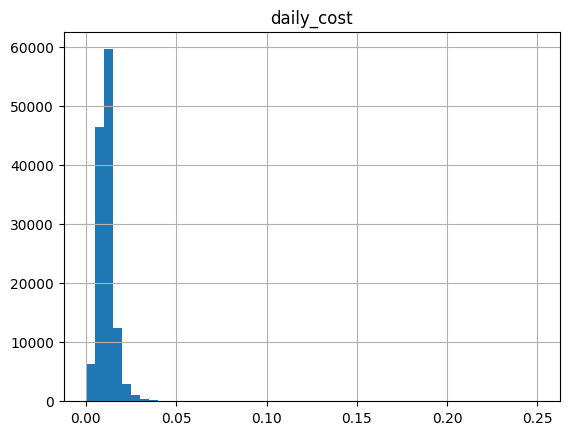

                                      TRACKS
ACOUSTICNESS


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,acousticness,129648,0.0,0.996,0.41755,54134.576468,546.440307,-1.383039,0.250805,0.335652,0.335651,0.112662,0.112661


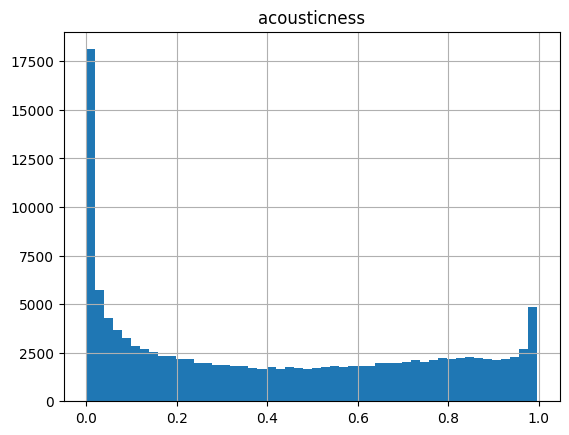

DANCEABILITY


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,danceability,129648,0.0,0.988,0.564894,73237.4093,491.2168,-0.258259,-0.28432,0.159114,0.159113,0.025317,0.025317


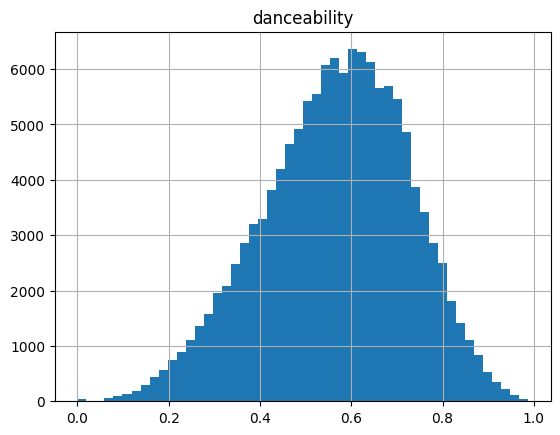

DURATION_MS


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,duration_ms,129648,3344,4995083,228526.632274,29628020821,11430854470,281.491889,10.884919,113801.507474,113801.068587,1.295078e+10,1.295068e+10


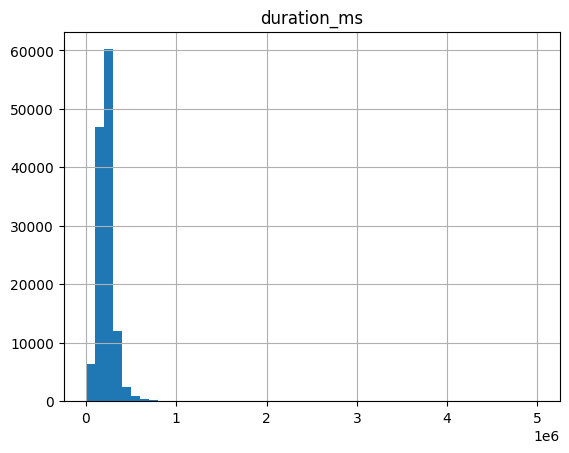

ENERGY


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,energy,129648,0.0,1.0,0.562776,72962.72439,543.752618,-0.899073,-0.168391,0.241957,0.241956,0.058543,0.058543


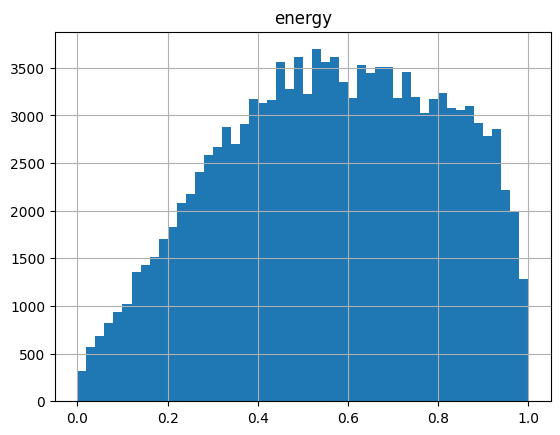

EXPLICIT


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,explicit,129648,0,1,0.036399,4719,1,22.511391,4.950898,0.18728,0.18728,0.035074,0.035074


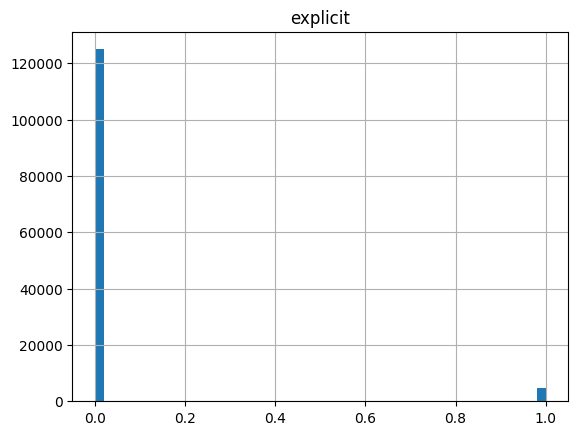

INSTRUMENTALNESS


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,instrumentalness,129648,0.0,1.0,0.086754,11247.463381,549.236231,6.200105,2.759591,0.232285,0.232284,0.053956,0.053956


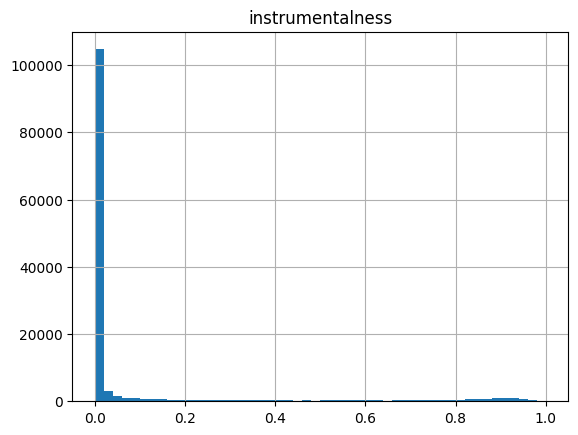

KEY


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,key,129648,0,11,5.242873,679728,66,-1.265013,-0.011349,3.518889,3.518876,12.382581,12.382485


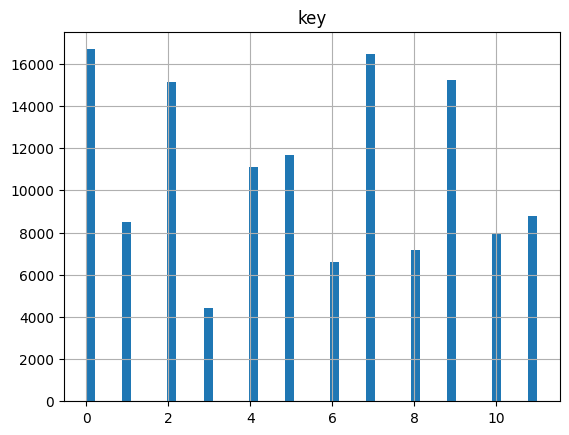

LIVENESS


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,liveness,129648,0.0,0.999,0.21406,27752.50933,543.09323,4.380976,2.072202,0.186901,0.1869,0.034932,0.034932


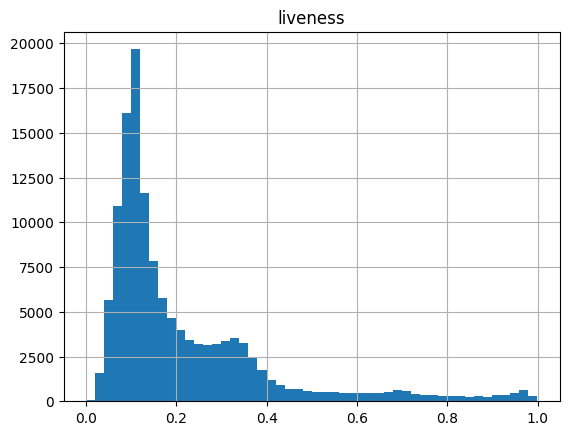

LOUDNESS


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,loudness,129648,-60.0,4.362,-9.734177,-1262016.64,-252312.279,2.778514,-1.104693,4.5213,4.521283,20.442158,20.442


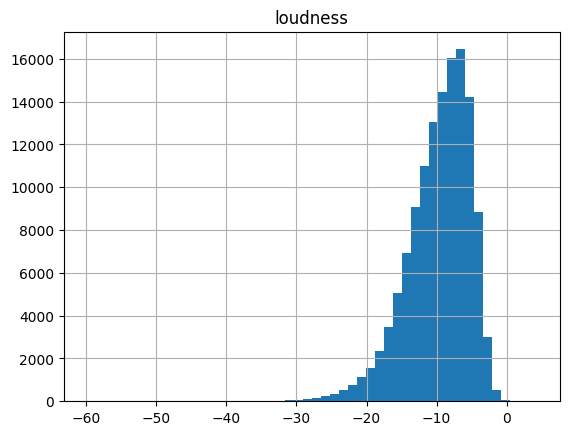

POPULARITY


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,popularity,129648,0,99,29.671241,3846817,4474,-0.484103,0.223677,17.1278,17.127734,293.361545,293.359283


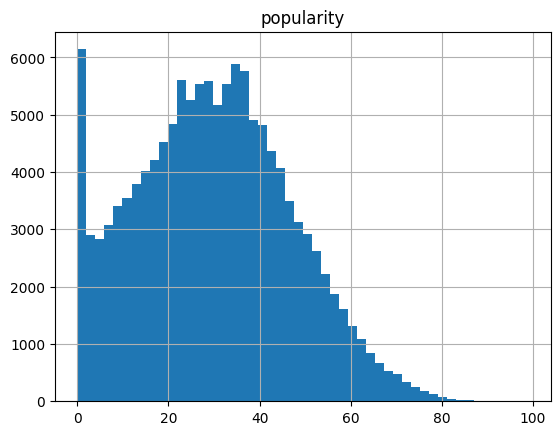

SPEECHINESS


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,speechiness,129648,0.0,0.969,0.095068,12325.3914,503.1898,16.456687,4.045176,0.166167,0.166166,0.027611,0.027611


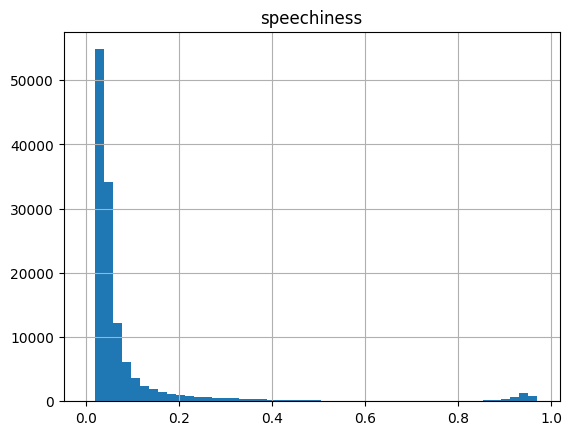

TEMPO


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,tempo,129648,0.0,243.507,119.53864,1.549795e+07,8607442.191,-0.106043,0.402869,29.653393,29.653278,879.323707,879.316925


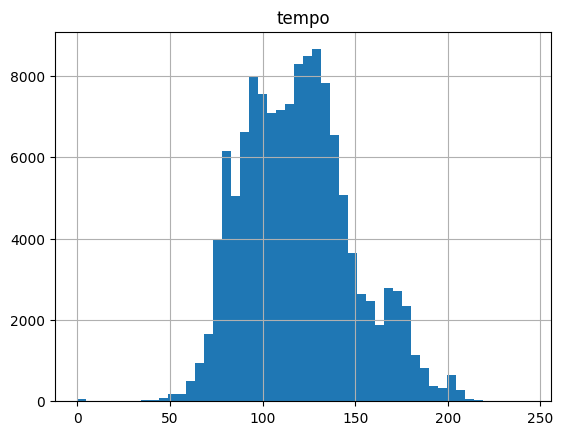

VALENCE


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,valence,129648,0.0,1.0,0.563443,73049.2694,537.05768,-1.035815,-0.154964,0.252581,0.25258,0.063797,0.063796


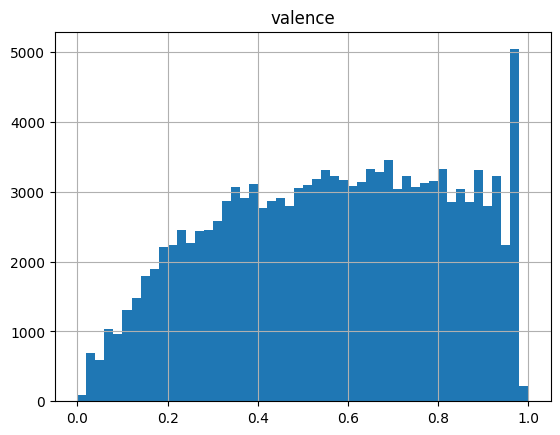

                                      USERS
USER_ID


,name,count,min,max,average,sum,sumDistinct,kurtosis,skewness,standard_deviation,population_standard_deviation,variance,population_variance
0,user_id,20000,101,20100,10100.5,202010000,202010000,-1.2,5.753064e-17,5773.647028,5773.502685,33335000.0,33333333.25


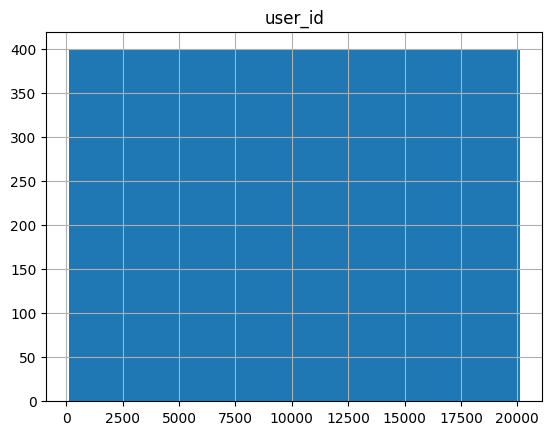

In [135]:
def aggregate_numeric_column(view: str, column: str) -> str:
    return f"""--sql
            SELECT
                "{column}" AS name,
                COUNT({column}) AS count,
                MIN({column}) AS min,
                MAX({column}) AS max,
                AVG({column}) AS average,
                SUM({column}) AS sum,
                SUM(DISTINCT {column}) AS sumDistinct,
                KURTOSIS({column}) AS kurtosis,
                SKEWNESS({column}) AS skewness,
                STDDEV({column}) AS standard_deviation,
                STDDEV_POP({column}) AS population_standard_deviation,
                VARIANCE({column}) AS variance,
                VAR_POP({column}) AS population_variance
            FROM {view}
            WHERE {column} IS NOT NULL
        """

for view, data_frame in DATA_FRAMES:
    show_table_name(view)
    for column, type in data_frame.dtypes:
        if type in ['double', 'bigint']:
            show_column_name(column)
            df = spark.sql(aggregate_numeric_column(view, column))
            display(df.toPandas())

            dfp = spark.sql(f"SELECT {column} FROM {view}").toPandas()
            dfp.hist(bins=50)
            plt.show()

In [136]:
def explode_column(view: str, column: str) -> str:
    return f"""--sql
            SELECT
                DISTINCT EXPLODE({column}) AS distinct_{column}
            FROM {view}
            ORDER BY distinct_{column} NULLS FIRST
        """


def count_exploded_column(view: str, column: str) -> str:
    exploded = f"""--sql
        SELECT
            DISTINCT EXPLODE({column}) AS {column}
        FROM {view}
    """

    return f"""--sql
            SELECT
                COUNT(*) AS length
            FROM ({exploded})
        """

for view, data_frame in DATA_FRAMES:
    show_table_name(view)
    for column, type in data_frame.dtypes:
        if type.startswith('array'):
            show_column_name(column)
            df = spark.sql(explode_column(view, column))
            display(df.toPandas())
            df = spark.sql(count_exploded_column(view, column))
            display(df.toPandas())

                                     ARTISTS
GENRES


,distinct_genres
0,48g
1,a cappella
2,abstract
3,abstract hip hop
4,accordeon
...,...
3907,zolo
3908,zouglou
3909,zouk
3910,zouk riddim


,length
0,3912


                                     SESSIONS
                                  TRACK_STORAGE
                                      TRACKS
                                      USERS
FAVOURITE_GENRES


,distinct_favourite_genres
0,adult standards
1,album rock
2,alternative metal
3,alternative rock
4,argentine rock
5,art rock
6,blues rock
7,brill building pop
8,c-pop
9,classic rock


,length
0,50
